In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('seattle-crime-stats-by-police-precinct-2008-present.csv')

In [3]:
df.head(10)

,Police Beat,CRIME_TYPE,CRIME_DESCRIPTION,STAT_VALUE,REPORT_DATE,Sector,Precinct,Row_Value_ID
0,R2,Rape,Rape,1,2014-04-30T00:00:00.000,R,SE,27092
1,K2,Assault,Assault,5,2014-04-30T00:00:00.000,K,W,26506
2,M2,Homicide,Homicide,1,2014-04-30T00:00:00.000,M,W,27567
3,C3,Robbery,Robbery,2,2014-04-30T00:00:00.000,C,E,26225
4,E2,Motor Vehicle Theft,"Vehicle Theft is theft of a car, truck, motorc...",7,2014-04-30T00:00:00.000,E,E,26368
5,S3,Burglary,Burglary,11,2014-04-30T00:00:00.000,S,SE,27237
6,G3,Assault,Assault,1,2014-04-30T00:00:00.000,G,E,26422
7,R3,Homicide,Homicide,0,2014-04-30T00:00:00.000,R,SE,27119
8,O1,Rape,Rape,1,2014-04-30T00:00:00.000,O,SE,26588
9,W3,Burglary,Burglary,6,2014-04-30T00:00:00.000,W,SW,27349


In [4]:
pd.crosstab(df["Precinct"], df["CRIME_TYPE"])

CRIME_TYPE,Assault,Burglary,Homicide,Larceny-Theft,Motor Vehicle Theft,Rape,Robbery
Precinct,,,,,,,
E,684,684,684,684,684,684,684
N,1139,1139,1139,1139,1139,1139,1139
SE,684,684,684,684,684,684,684
SW,456,456,456,456,456,456,456
W,913,912,911,911,912,912,913


In [21]:
pd.crosstab(df["Sector"], df["CRIME_TYPE"])

CRIME_TYPE,Assault,Burglary,Homicide,Larceny-Theft,Motor Vehicle Theft,Rape,Robbery
Sector,,,,,,,
B,227,227,227,227,227,227,227
C,228,228,228,228,228,228,228
D,228,228,228,228,228,228,228
E,228,228,228,228,228,228,228
F,228,228,228,228,228,228,228
G,228,228,228,228,228,228,228
J,228,228,228,228,228,228,228
K,228,228,228,228,228,228,228
L,228,228,228,228,228,228,228


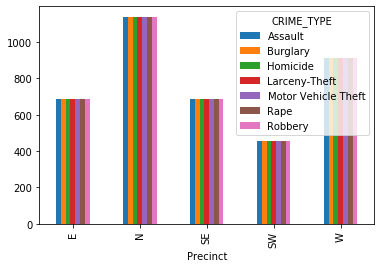

In [15]:
df.groupby(["Precinct"])["CRIME_TYPE"].value_counts().unstack().plot(
            kind='bar', stacked=False)

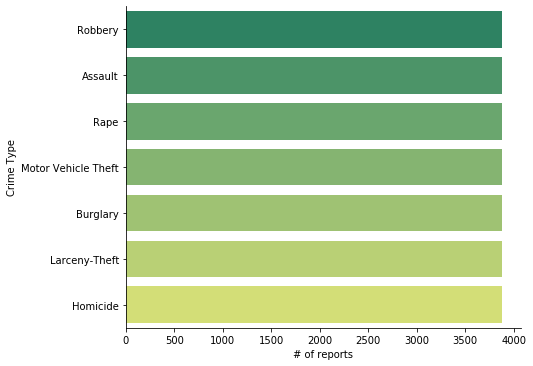

In [19]:
sns.catplot(
    y='CRIME_TYPE',
    data=df,
    kind='count',
    order=df['CRIME_TYPE'].value_counts().index,
    aspect=1.5,
    palette='summer'
).set_axis_labels('# of reports', 'Crime Type')


In [49]:
df["CRIME_TYPE"].unique()
nonv = ['Robbery', 'Motor Vehicle Theft', 'Burglary', 'Larceny-Theft']
crimes = df.loc[df['CRIME_TYPE'].isin(nonv)]
crimes = crimes.drop(['REPORT_DATE', 'Row_Value_ID'], axis=1)
crimes.sort_values('CRIME_TYPE', ascending=False).head(10)

,Police Beat,CRIME_TYPE,CRIME_DESCRIPTION,STAT_VALUE,Sector,Precinct
3,C3,Robbery,Robbery,2,C,E
12878,F3,Robbery,Robbery,1,F,SW
12694,N2,Robbery,Robbery,2,N,N
12687,U1,Robbery,Robbery,2,U,N
12680,B2,Robbery,Robbery,1,B,N
12672,B3,Robbery,Robbery,1,B,N
12665,J1,Robbery,Robbery,0,J,N
12658,U2,Robbery,Robbery,0,U,N
12651,U3,Robbery,Robbery,0,U,N
12644,J2,Robbery,Robbery,0,J,N


In [50]:
#this dataset was weird